In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import copy

In [2]:
try:
    data = pd.read_csv('E:\\DataSet.csv')
except:
    print("file not found...")

In [3]:
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack',\
             'targtype1_txt':'target', 'corp1':'target_inst', 'target1':'target_pop', 'natlty1_txt':'nationality',\
             'gname':'group','weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype', 'nkill':'kill', \
             'nwound':'wound','propextent_txt':'property_damg', 'ransomamt':'ransom'},axis='columns',inplace=True)

In [4]:
data['casualties']=data['kill']+data['wound']

# TERRORISM IN PAKISTAN

In [5]:
pak=data[data.country=='Pakistan']

In [6]:
pak.describe()

,year,month,day,kill,wound,ransom,casualties
count,3271.000000,3271.000000,3271.000000,3200.000000,3164.000000,1.600000e+01,3160.000000
mean,2014.583308,6.121064,15.669520,2.169062,3.329646,2.806918e+06,5.423101
std,1.268418,3.470631,8.841135,6.395810,12.417304,7.626832e+06,17.674283
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,2014.000000,3.000000,8.000000,0.000000,0.000000,-9.900000e+01,0.000000
50%,2015.000000,6.000000,16.000000,1.000000,0.000000,8.256280e+04,1.000000
75%,2016.000000,9.000000,23.000000,2.000000,2.000000,8.854872e+05,4.000000
max,2016.000000,12.000000,31.000000,158.000000,351.000000,3.000000e+07,430.000000


* Maximum people ever wounded in an event is 351
* Maximum ransom amount ever asked was 3 Crores!
* An event witnessed 430 casualties!

<Figure size 720x360 with 0 Axes>

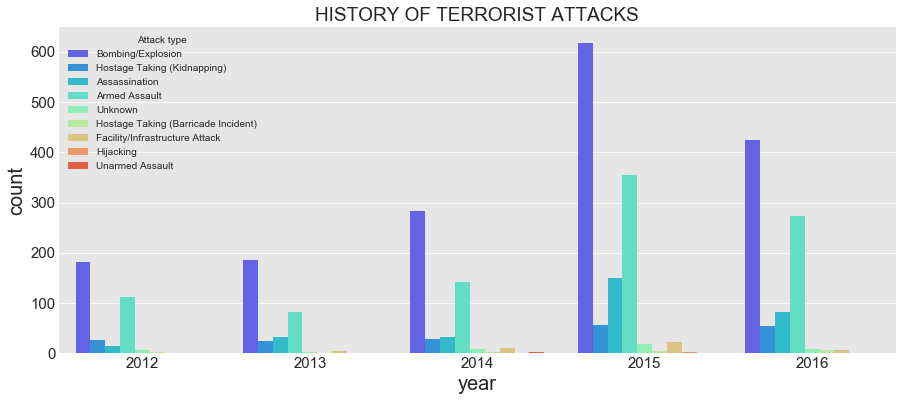

In [7]:
plt.figure(figsize=(10,5))
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=19
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.labelsize']=15
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
plt.figure(figsize=(15,6))
sns.countplot(x=pak.year,hue = 'attack', data = pak, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* Shows more than two fold rise in attacks in year 2015, with a slight decrease in 2016 
* Terrorism in Pakistan show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault in each year

In [8]:
max_killed = pak['kill'].max()
idx = pak.loc[pak.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',pak.at[idx,'city'],\
     '\nwhich was carried by',pak.at[idx,'group'],'using',pak.at[idx,'weapon_type'],\
     '\nand maximum people killed were',pak.at[idx,'target'],'who were attack with',pak.at[idx,'attack'])

Maximum people killed in an attack are 158.0 
in the Peshawar 
which was carried by Tehrik-i-Taliban Pakistan (TTP) using Explosives/Bombs/Dynamite 
and maximum people killed were Educational Institution who were attack with Hostage Taking (Barricade Incident)


In [9]:
print("The no. of Terrorist groups in Pakistan is",len(pak['group'].unique()))

The no. of Terrorist groups in Pakistan is 62


** Top 10 Terrorist Groups with casualties**

In [10]:
grp_cas = pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)][['group','casualties']].groupby('group').sum().reset_index()
grp_cas.sort_values(by='casualties',ascending=False)

,group,casualties
7,Tehrik-i-Taliban Pakistan (TTP),7579.0
9,Unknown,2042.0
5,Lashkar-e-Jhangvi,1867.0
8,United Baloch Army (UBA),673.0
2,Baloch Republican Army (BRA),569.0
4,Lashkar-e-Islam (Pakistan),564.0
3,Khorasan Chapter of the Islamic State,536.0
0,Baloch Liberation Army (BLA),395.0
1,Baloch Liberation Front (BLF),355.0
6,Sindhu Desh Liberation Army (SDLA),73.0


** Top 10 Terrorist Groups with attack count**

In [11]:
grp_cnt=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

,group,count_of_attack
0,Unknown,1415
1,Tehrik-i-Taliban Pakistan (TTP),690
2,Baloch Republican Army (BRA),248
3,Baloch Liberation Front (BLF),152
4,Baloch Liberation Army (BLA),105
5,Lashkar-e-Jhangvi,88
6,United Baloch Army (UBA),87
7,Lashkar-e-Islam (Pakistan),83
8,Sindhu Desh Liberation Army (SDLA),52
9,Khorasan Chapter of the Islamic State,51


In [12]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

,group,casualties,count_of_attack
7,Tehrik-i-Taliban Pakistan (TTP),7579.0,690
9,Unknown,2042.0,1415
5,Lashkar-e-Jhangvi,1867.0,88
8,United Baloch Army (UBA),673.0,87
2,Baloch Republican Army (BRA),569.0,248
4,Lashkar-e-Islam (Pakistan),564.0,83
3,Khorasan Chapter of the Islamic State,536.0,51
0,Baloch Liberation Army (BLA),395.0,105
1,Baloch Liberation Front (BLF),355.0,152
6,Sindhu Desh Liberation Army (SDLA),73.0,52


* Tehrik-i-Taliban Pakistan (TTP) tops the list in terms of casualities 
* Lashkar-e-Jhangvi,United Baloch Army (UBA),Lashkar-e-Islam (Pakistan) and Khorasan Chapter of the Islamic State caused alot of casualities in much less number of attacks

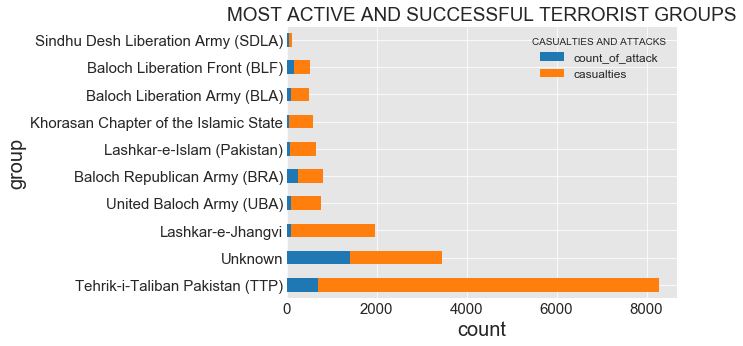

In [13]:
ax = grp.plot.barh(x='group',y=['count_of_attack','casualties'],stacked=True,figsize=(7,5))
ax.set_title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
ax.set_xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Tehrik-i-Taliban Pakistan (TTP) and other groups caused great human loss in less attacks. It proves they have been very successful in their attempts.

Text(0.5,1,'MOST TARGETED CITIES')

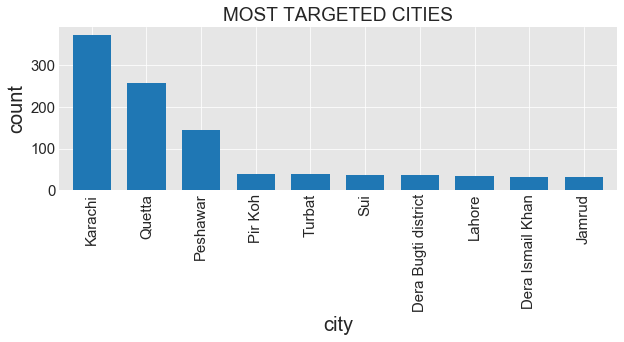

In [14]:
pak[pak['city'].isin(pak['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,3),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Karachi is the most targeted city.It might be because it is the most populous city,home to two largest seaports and home to the most busiest airport of the Pakistan,Jinnah International Airport. It is also the premier industrial and financial centre and most cosmopolitan city of the country. It was also the first capital of the country.

Text(0.5,1,'TERRORIST GROUPS AND THEIR ATTACK TYPE')

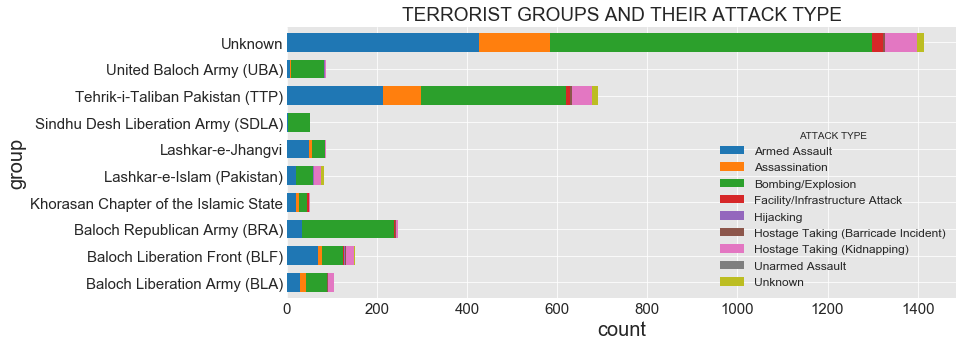

In [15]:
p1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['attack']).plot.barh(stacked=True,figsize=(12,5),width=0.7)
plt.legend(title="ATTACK TYPE",loc=4,fontsize='large')
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR ATTACK TYPE')

* Bombing/explosion and armed assault has been extensively used by groups
* Even the most successful terrorist group in country Tehrik-i-Taliban Pakistan (TTP) used the same

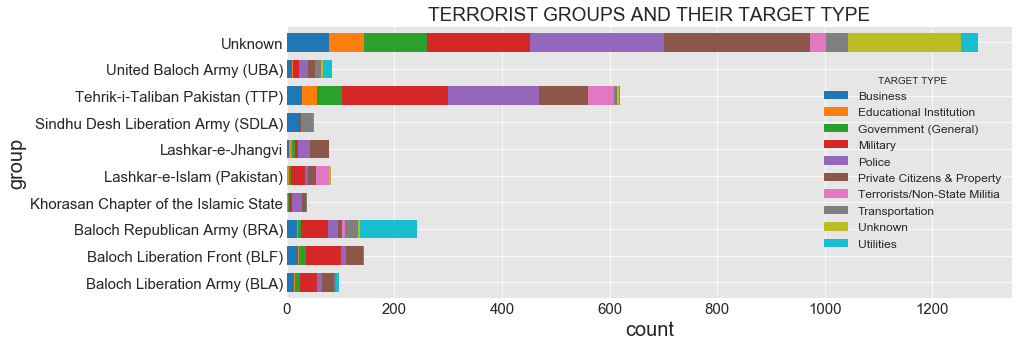

In [17]:
p1=p1[p1['target'].isin(p1['target'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['target']).plot.barh(stacked=True,figsize=(13,5),width=0.7)
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR TARGET TYPE')
plt.legend(title="TARGET TYPE",loc=7,fontsize='large')

* The Unknown groups have targeted almost all types.
* Tehrik-i-Taliban Pakistan (TTP) seem to target the defence force of the country extensively. 
* Military system,private citizens and property are attacked almost by all groups.

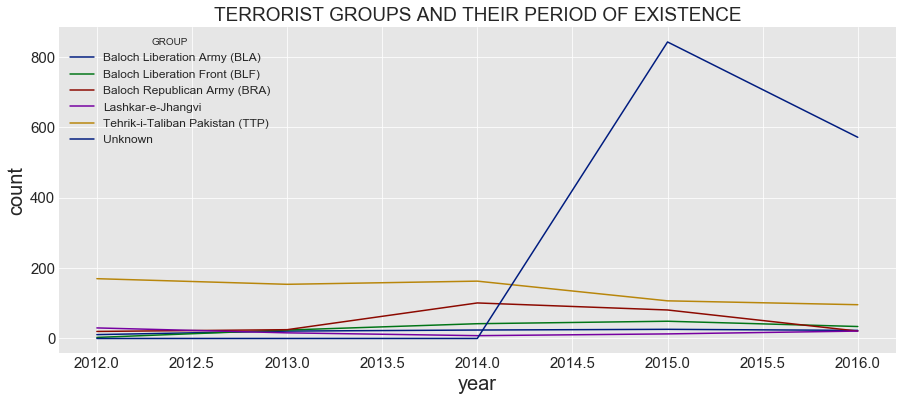

In [18]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['year'],pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=0,fontsize='large')

* The TTP has been the most active group since 2012 until 2014 where it showed a slight decrease 
* The Unknown groups show sharp rise in their attacks in 2015.

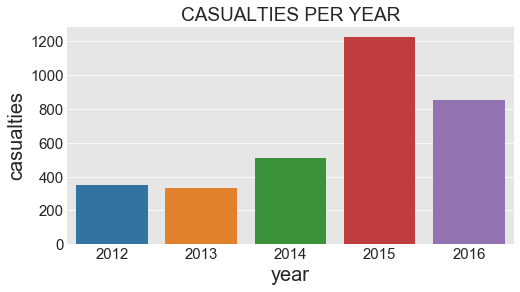

In [19]:
plt.figure(figsize=(8,4))
plt.title('CASUALTIES PER YEAR')
p1=pak['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=p1,x='year',y='casualties',ci=None)

2015 was the worst year for the country

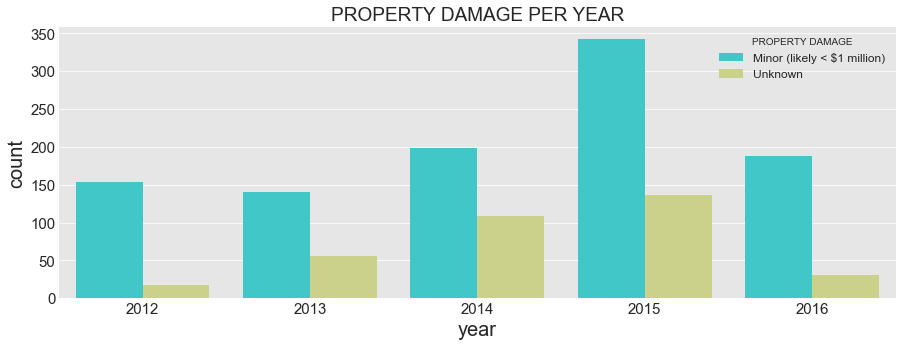

In [20]:
plt.figure(figsize=(15,5))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=pak,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

2015 saw most property damage

In [21]:
len(pak.weapon_type.unique())

6

Text(0.5,0.98,'Weapon Type used by Top 10 Terrorist Group')

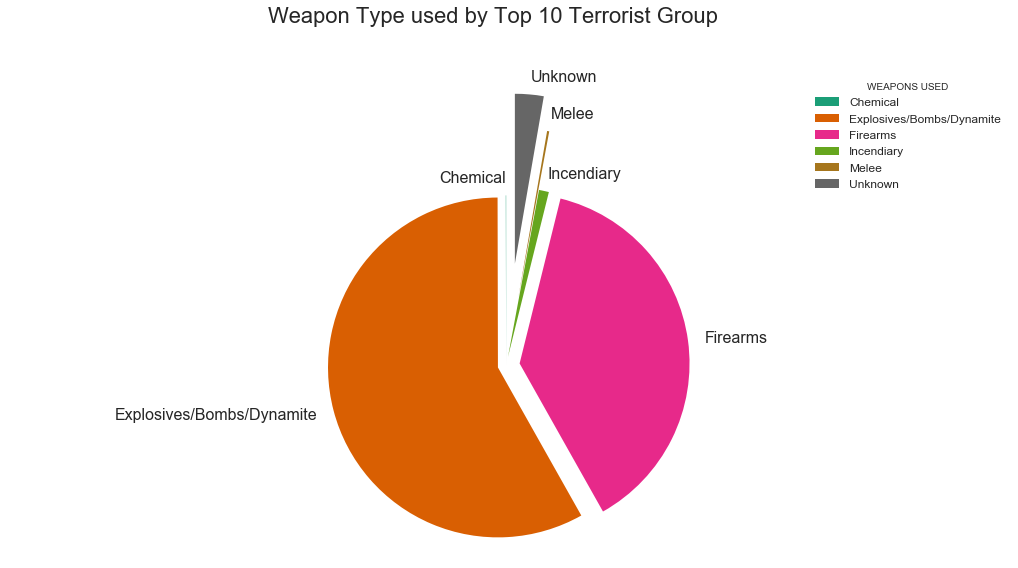

In [22]:
explode=(0.0, 0.05, 0.08, 0.05, 0.4,0.6)
v1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack
xattack=xattack[0:-1]
xattack.rename(columns={'All':''},inplace=True)
xattack.plot.pie(shadow=False,legend=False,y='',startangle=90,fontsize=16,figsize=(18,9),cmap='Dark2',grid=True,explode=explode)
plt.axis('equal')
plt.legend(title="WEAPONS USED",loc='best',fontsize='large')
plt.suptitle('Weapon Type used by Top 10 Terrorist Group',fontsize = 22)

More than 50% of the attacks used Explosives/Bombs/Dynamites.

In [23]:
print(pak.country.count(),pak.nationality.count())

3271 3270


In [24]:
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [25]:
pak['nationality'] = pak[['country','nationality']].apply(impute_nationality, axis = 1)
print(pak.country.count(),pak.nationality.count())

3271 3271


C:\Users\Dhriti Dhruve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
v1=pak[pak.nationality=='Pakistan']
v1.year.count()

3209

** This shows that 98% of the terrorist groups in Pakistan belonged to Pakistan itself !**

# TERRORISM IN NIGERIA

In [27]:
nig=data[data.country=='Nigeria']
nig.describe()

,year,month,day,kill,wound,ransom,casualties
count,2457.000000,2457.000000,2457.000000,2258.000000,1674.000000,1.700000e+01,1659.000000
mean,2014.232397,6.081807,15.502239,8.031444,4.403823,2.344224e+05,9.428571
std,1.368905,3.428454,8.963558,17.736774,14.296682,7.271576e+05,21.817235
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,2013.000000,3.000000,8.000000,1.000000,0.000000,-9.900000e+01,0.000000
50%,2014.000000,6.000000,15.000000,3.000000,0.000000,1.228200e+04,3.000000
75%,2015.000000,9.000000,23.000000,8.000000,3.000000,9.779970e+04,8.000000
max,2016.000000,12.000000,31.000000,315.000000,270.000000,3.029020e+06,392.000000


* An attack holds the casualty record of 392 !
* Mean killings per attack is 8,while mean wounded per attack is 4 

In [28]:
max_killed = nig['kill'].max()
idx = nig.loc[nig.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',nig.at[idx,'city'],\
     '\nwhich was carried by',nig.at[idx,'group'],'using',nig.at[idx,'weapon_type'],\
     '\nand maximum people killed were',nig.at[idx,'target'],'who were attacked with',nig.at[idx,'attack'])

Maximum people killed in an attack are 315.0 
in the Gamboru Ngala 
which was carried by Boko Haram using Explosives/Bombs/Dynamite 
and maximum people killed were Private Citizens & Property who were attacked with Armed Assault


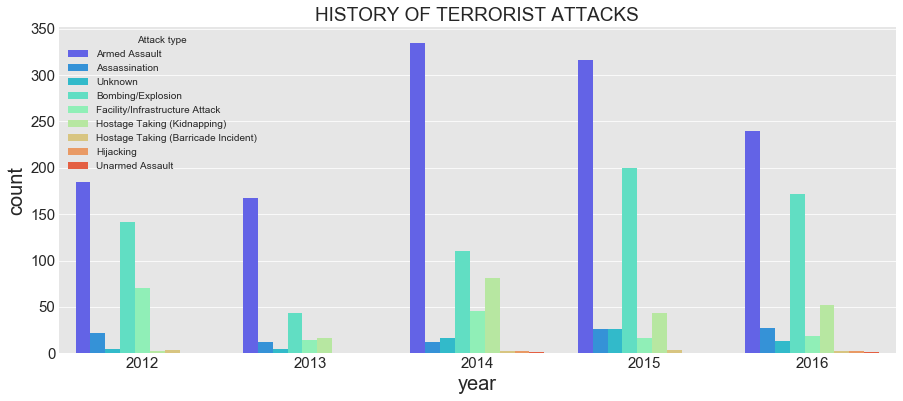

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x=nig.year,hue = 'attack', data = nig, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* There has been consistency in attacks in 2014 and 2015, with slight decrease in 2016. 2013 saw comparitively less attacks among others
* 2014 was the worst year for Nigeria as the attack frequency was highest

Text(0.5,1,'MOST TARGETED CITIES')

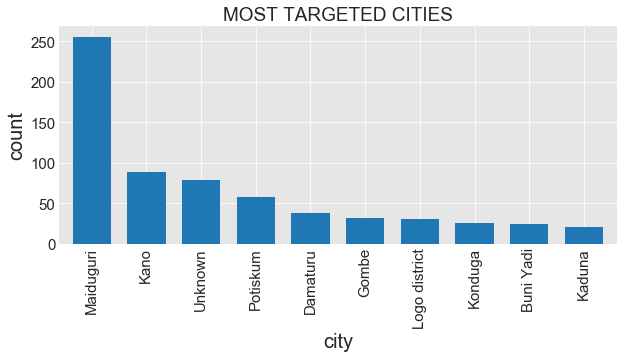

In [30]:
nig[nig['city'].isin(nig['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,4),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Maiduguri is the epicentre of attacks.

In [31]:
print("The no. of Terrorist groups in Nigeria is",len(nig['group'].unique()))

The no. of Terrorist groups in Nigeria is 27


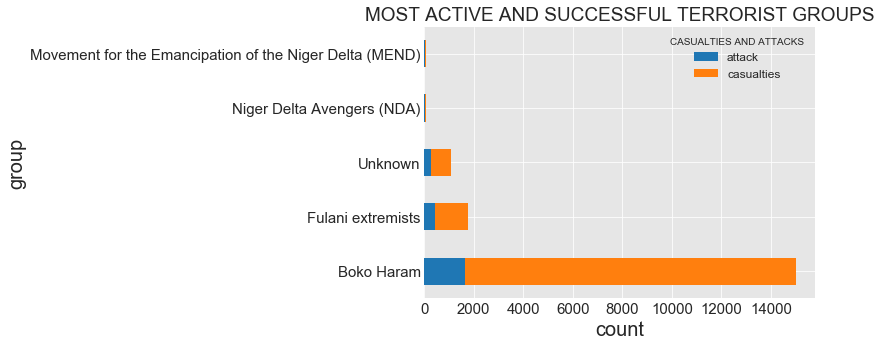

In [32]:
nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)][['group','casualties']].groupby('group').sum()\
.merge(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','casualties'],figsize=(7,5),stacked=True,width=0.5)
plt.title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
plt.xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Boko Haram is the most successful terrorist group, followed by Fulani extremists. 
* Boko Haram ,which originates from West Africa, seems to be the most prevalent terrorist group in the country.

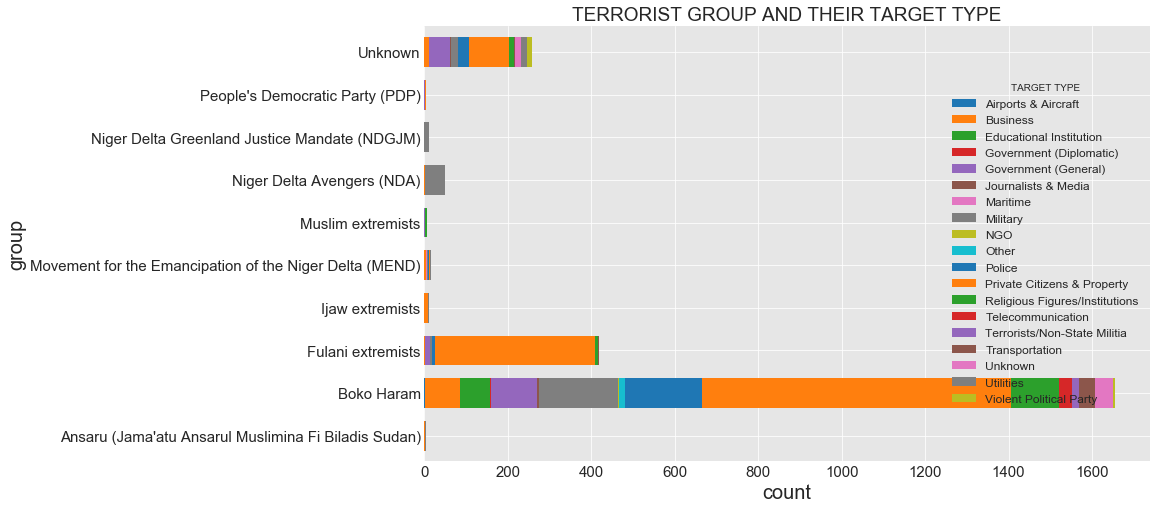

In [33]:
nig=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
pd.crosstab(nig['group'],nig['target']).plot.barh(stacked=True,figsize=(13,8),width=0.7)
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR TARGET TYPE')
plt.legend(title="TARGET TYPE",loc=7,fontsize='large')

Boko Haram and Fulani extremists have majorly attacked private citizens and property. Military and police are victomized too.

Text(0.5,1,'TERRORIST GROUP AND THEIR ATTACK TYPE')

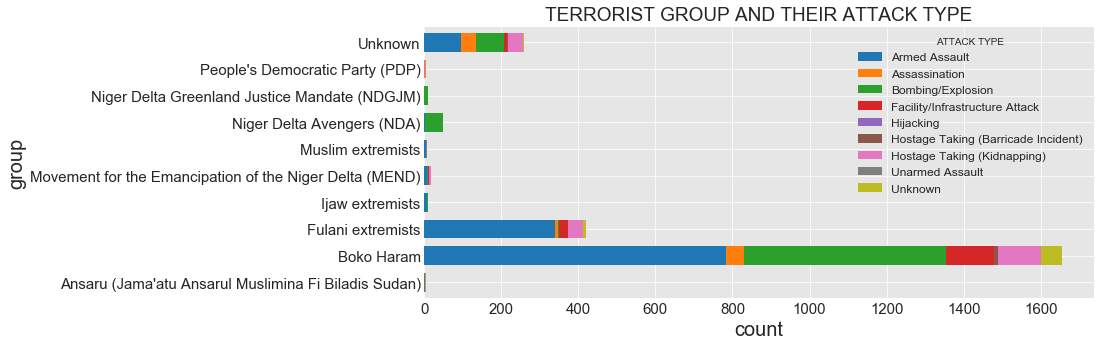

In [34]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
pd.crosstab(n1['group'],n1['attack']).plot.barh(stacked=True,figsize=(12,5),width=0.7)
plt.legend(title="ATTACK TYPE",loc=0,fontsize='large')
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR ATTACK TYPE')

Armed assault and bombing/explosion extensively used by Boko Haram.

In [35]:
len(nig.weapon_type.unique())

6

Text(0.5,1,'Weapon Type used by Top 10 Terrorist Group(Pie Chart)')

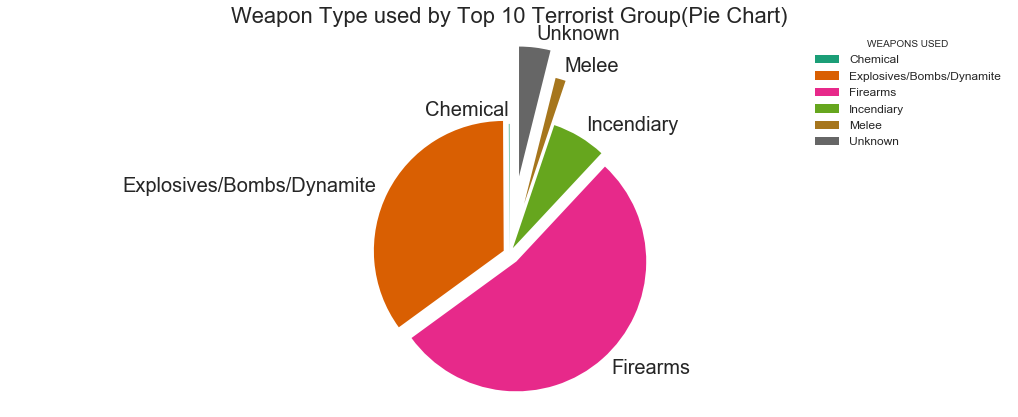

In [36]:
exniglode=(0.0, 0.05, 0.08, 0.04, 0.24,0.5)
v1=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack
xattack=xattack[0:-1]
xattack.rename(columns={'All':''},inplace=True)
xattack.plot.pie(shadow=False,legend=False,y='',startangle=90,fontsize=20,figsize=(18,7),cmap='Dark2',grid=True,explode=explode)
plt.axis('equal')
plt.legend(title="WEAPONS USED",loc='best',fontsize='large')
plt.title('Weapon Type used by Top 10 Terrorist Group(Pie Chart)',fontsize = 22)

More than 50% of the attacks used Firearms.

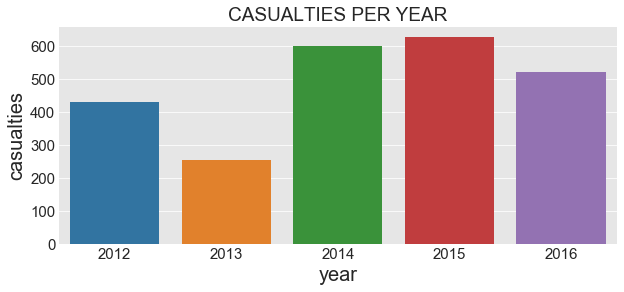

In [37]:
plt.figure(figsize=(10,4))
plt.title('CASUALTIES PER YEAR')
v1=nig['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=v1,x='year',y='casualties',ci=None)

2015 and 2014 saw almost same number of casualties

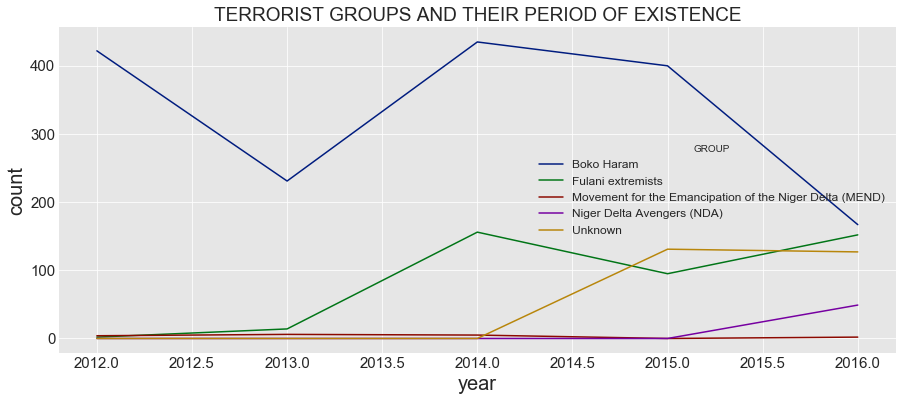

In [38]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['year'],nig[nig['group'].isin(nig['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=7,fontsize='large')

* Boko Haram showed sharp decrease in their attacks in 2013, then a rise next year, then again a slight fall in 2015, then a steep fall in 2016. 
* Fulani extremists suddenly came into existence in 2014, going down, then up, after that.
* Niger Delta Avengers came into limelight in 2016
* Hence there is no consistency in the attack number by all groups 

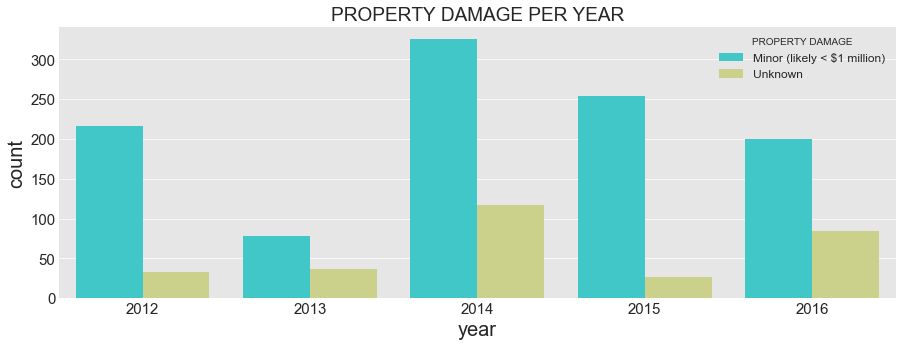

In [39]:
plt.figure(figsize=(15,5))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=nig,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

Major property damage occured in 2014 

In [40]:
print(nig.country.count(),nig.nationality.count())

2435 2434


In [41]:
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [42]:
nig['nationality'] = nig[['country','nationality']].apply(impute_nationality, axis = 1)
print(nig.country.count(),nig.nationality.count())

2435 2435


In [43]:
v1=nig[nig.nationality=='Nigeria']
v1.year.count()

2410

This shows that 98% of the terrorist groups in Nigeria belonged to Nigeria itself !